<a href="https://colab.research.google.com/github/Shanelynch/Notebooks/blob/main/Capstone_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For my capstone project, i am going to be using a dataset on detecting Diabetes in women of Pima Indian heritage.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import neighbors
import scipy
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn import preprocessing

https://raw.githubusercontent.com/Shanelynch/datasets/main/diabetes.csv Dataset being used

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Reading in the data and displaying the first few rows

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Shanelynch/datasets/main/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Displaying some info about the data.

*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2)
*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)
*   Outcome: Class variable (0 or 1)







In [ ]:
df.info()

print('-------')
print('shape:', df.shape )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
-------
shape: (768, 9)


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


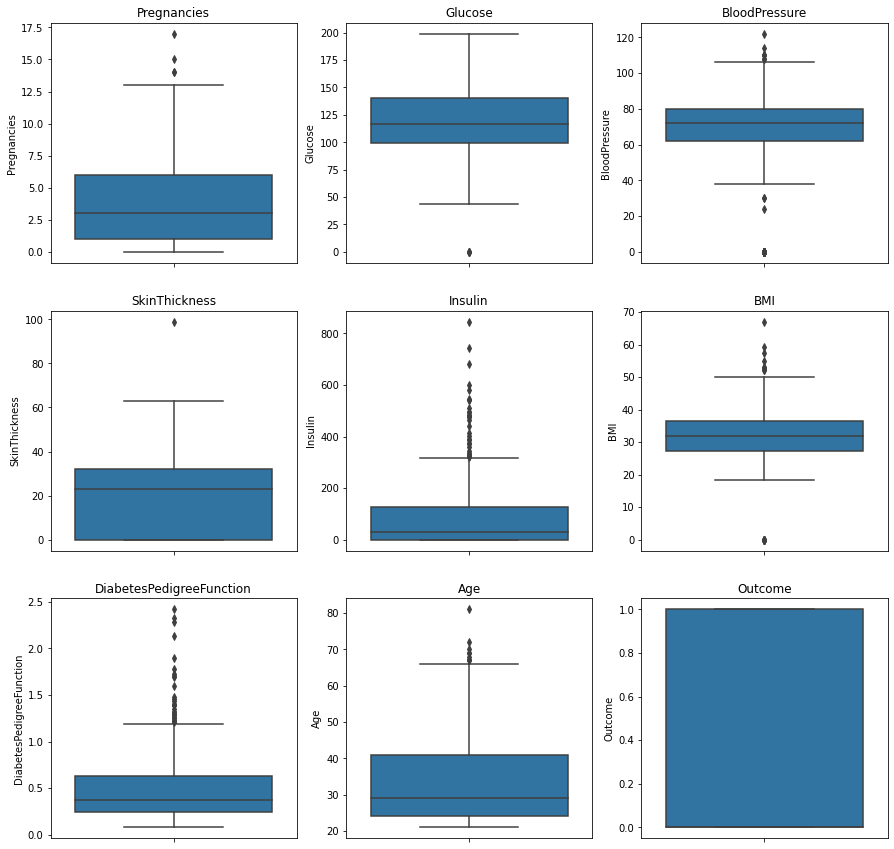

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(3, 3, counter)
    #sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

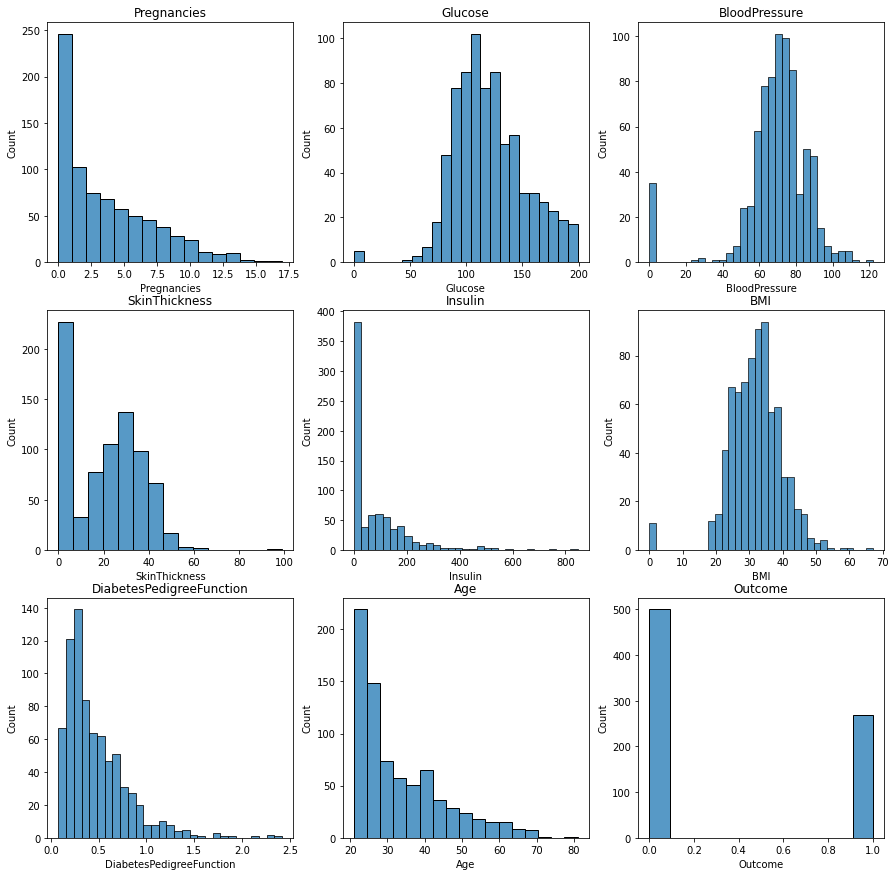

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(3, 3, counter)
    sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    #sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

Based on the info of the data displayed above, we can see that there are many outliers in this dataset. We can try to clean this up as best as we can

In [ ]:
df = df.loc[(df['Glucose']!=0.0)]

In [ ]:
q75, q25 = np.percentile(df, [75, 25])
iqr = q75 - q25

min_val = q25 - (iqr * 1.5)
max_val = q75 + (iqr * 1.5)
print("Number of outliers is: {}".format(len((np.where((df > max_val) | (df < min_val))[0]))))

Number of outliers is: 273


In [ ]:
#df['Insulin'].replace(0, np.nan, inplace = True)
#df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)

In [ ]:
df['Pregnancies'] = winsorize(df['Pregnancies'], (0, 0.10))
df['Pregnancies'].describe()

count    763.000000
mean       3.672346
std        2.983790
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max        9.000000
Name: Pregnancies, dtype: float64

In [ ]:
df['Insulin'] = winsorize(df['Insulin'], (0, 0.10))
df['Insulin'].describe()

count    763.000000
mean      66.699869
std       77.586665
min        0.000000
25%        0.000000
50%       36.000000
75%      128.500000
max      210.000000
Name: Insulin, dtype: float64

In [ ]:
df['BMI'].replace(0, np.nan, inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

df['BMI'] = winsorize(df['BMI'], (0, 0.10))
df['BMI'].describe()

count    763.000000
mean      32.023462
std        5.962702
min       18.200000
25%       27.500000
50%       32.400000
75%       36.550000
max       41.500000
Name: BMI, dtype: float64

In [ ]:
df['BloodPressure'].replace(0, np.nan, inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

df['BloodPressure'] = winsorize(df['BloodPressure'], (0.05, 0.10))
df['BloodPressure'].describe()

count    763.000000
mean      72.046313
std       10.188066
min       52.000000
25%       64.000000
50%       72.438187
75%       80.000000
max       88.000000
Name: BloodPressure, dtype: float64

In [ ]:
df['SkinThickness'] = winsorize(df['SkinThickness'], (0, 0.10))
df['SkinThickness'].describe()

count    763.000000
mean      19.887287
std       14.914028
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       40.000000
Name: SkinThickness, dtype: float64

In [ ]:
df['DiabetesPedigreeFunction'] = winsorize(df['DiabetesPedigreeFunction'], (0, 0.10))
df['DiabetesPedigreeFunction'].describe()

count    763.000000
mean       0.438803
std        0.241567
min        0.078000
25%        0.243500
50%        0.374000
75%        0.626500
max        0.880000
Name: DiabetesPedigreeFunction, dtype: float64

In [ ]:
df['Age'] = winsorize(df['Age'], (0, 0.10))
df['Age'].describe()

count    763.000000
mean      32.467890
std        9.967662
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       51.000000
Name: Age, dtype: float64

Now after some data cleaning, lets take another look at the data

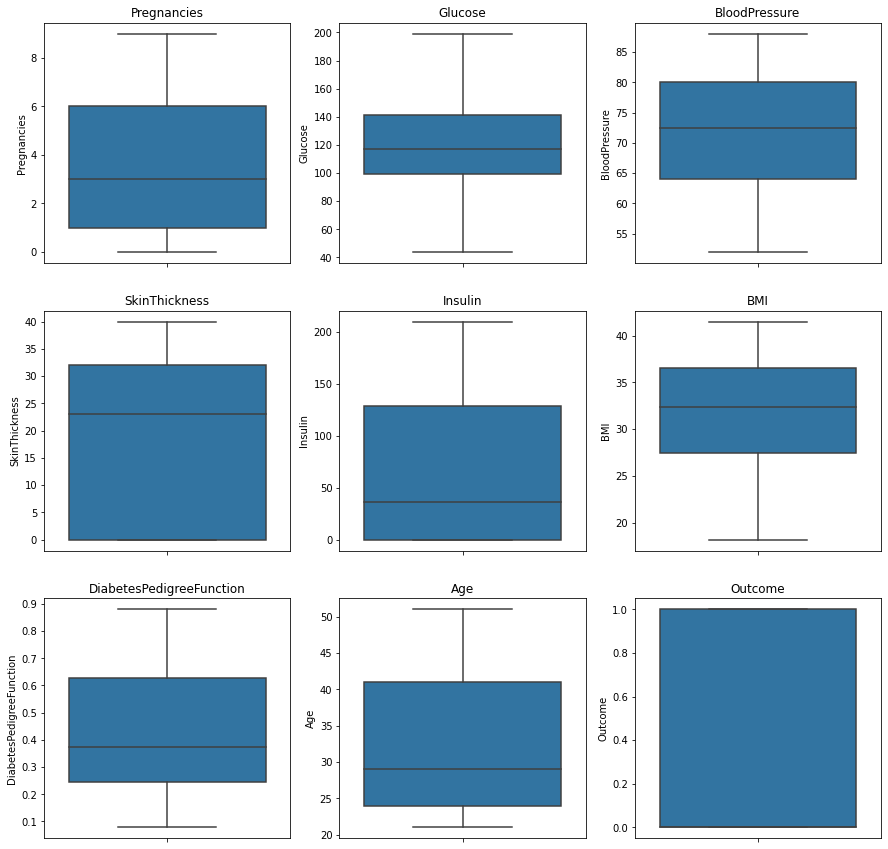

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(3, 3, counter)
    #sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

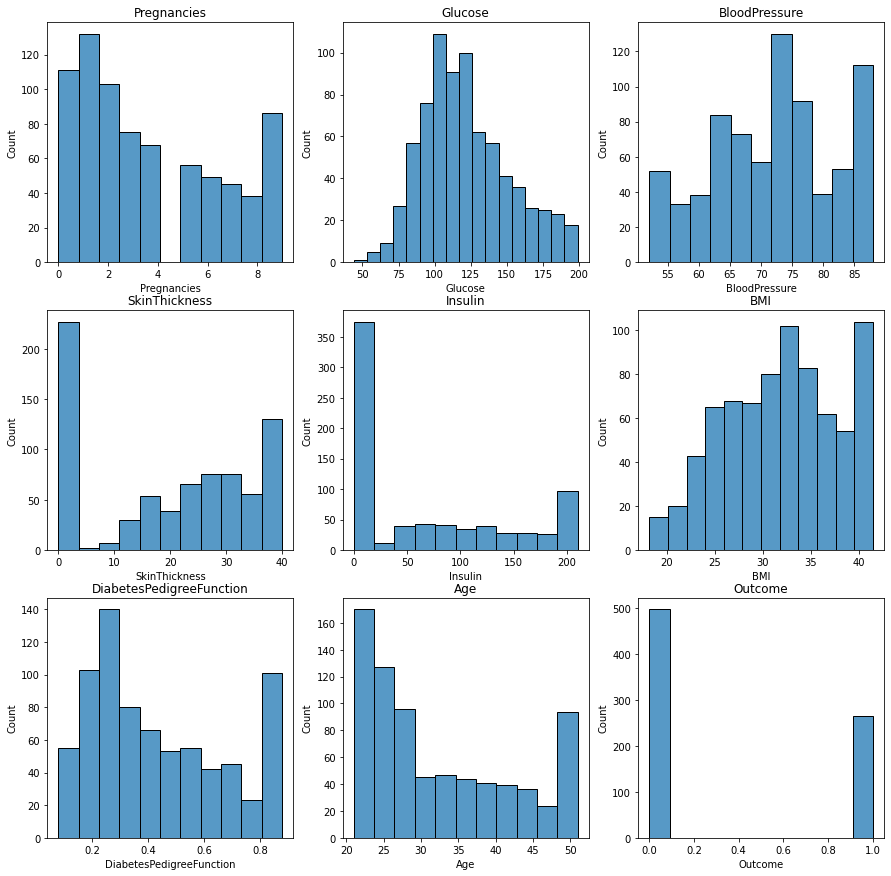

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(3, 3, counter)
    sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    #sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

The data seems fairly clean from before, so now we can take a better look at the features of the data set. All of these data points are useful in my opinion. They can all be put to use for modeling.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.217819,0.494650,0.170099,0.060892,0.112971,0.305027,0.177958,0.281775,1.000000
Glucose,0.136368,1.000000,0.223328,0.058216,0.269914,0.234849,0.107269,0.272587,0.494650
BMI,0.022450,0.234849,0.281566,0.372231,0.202233,1.000000,0.134588,0.077826,0.305027
Age,0.612629,0.272587,0.354650,-0.113472,-0.076453,0.077826,0.042656,1.000000,0.281775
Pregnancies,1.000000,0.136368,0.211680,-0.091809,-0.101007,0.022450,-0.021836,0.612629,0.217819
DiabetesPedigreeFunction,-0.021836,0.107269,0.016540,0.171515,0.217705,0.134588,1.000000,0.042656,0.177958
BloodPressure,0.211680,0.223328,1.000000,0.010757,-0.059524,0.281566,0.016540,0.354650,0.170099
Insulin,-0.101007,0.269914,-0.059524,0.540098,1.000000,0.202233,0.217705,-0.076453,0.112971
SkinThickness,-0.091809,0.058216,0.010757,1.000000,0.540098,0.372231,0.171515,-0.113472,0.060892


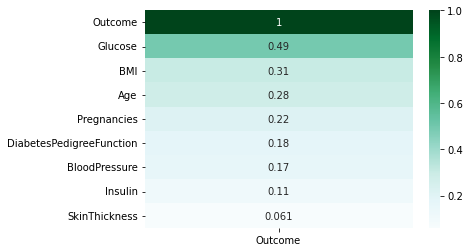

In [ ]:
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
sns.heatmap(correlation, cmap = "BuGn", annot=True)

In [ ]:
high_corr = df[['Outcome', 'Age','Glucose', 'BMI']]

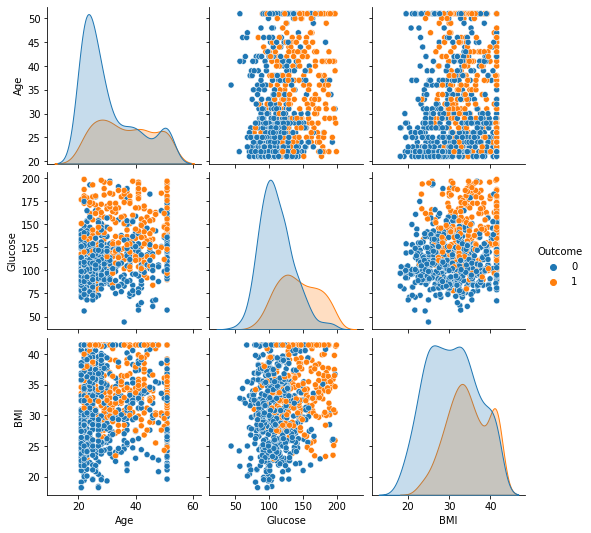

In [ ]:
sns.pairplot(data=high_corr, hue='Outcome',hue_order=[0,1])

As we can see from the correlation heat map above, Glucose and BMI have the highest correlation to the outcome.

In [ ]:
df.Outcome.value_counts()

0    497
1    266
Name: Outcome, dtype: int64

We will start with a logistic regression using all of the features.

In [ ]:
new_frame = df.drop(['Outcome'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_frame, df.Outcome, random_state=120)

lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter = 1000, random_state=42)
lr.fit(X_train, y_train)


print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score: 0.806282722513089
# of iterations 130
Accuracy scores for the five folds:  [0.77391304 0.73913043 0.71929825 0.81578947 0.74561404]
Mean cross-validation score: 0.759


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_frame, df.Outcome, random_state=120)

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter = 1000, random_state=10)
lr.fit(X_train, y_train)


print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score: 0.8010471204188482
# of iterations 148
Accuracy scores for the five folds:  [0.76521739 0.73913043 0.71929825 0.80701754 0.74561404]
Mean cross-validation score: 0.755


Next we will try another logistic regression, but this time we will omit the 'Pregnancies' variable.

In [ ]:
non_preg = df.drop(['Outcome', 'Pregnancies'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(non_preg, df.Outcome, random_state=120)

lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter = 1000, random_state=20)
lr.fit(X_train, y_train)


print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score: 0.806282722513089
# of iterations 108
Accuracy scores for the five folds:  [0.76521739 0.73043478 0.69298246 0.81578947 0.73684211]
Mean cross-validation score: 0.748


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(non_preg, df.Outcome, random_state=200)

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter = 1000, random_state=20)
lr.fit(X_train, y_train)


print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score: 0.8115183246073299
# of iterations 100
Accuracy scores for the five folds:  [0.73913043 0.73043478 0.75438596 0.74561404 0.81578947]
Mean cross-validation score: 0.757


There does not seem to be a big difference in the models performance when considering pregnancies.

Now we will try a gradient boosting model, with the same features as the first model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_frame, df.Outcome, random_state=10)


clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.76521739 0.7826087  0.76315789 0.79824561 0.72807018]
Mean cross-validation score: 0.767


In [ ]:
small_features = df.drop(['DiabetesPedigreeFunction', 'Pregnancies', 'Insulin', 'BloodPressure', 'SkinThickness', 'Outcome'], axis = 1)

Confusion matrix, without normalization


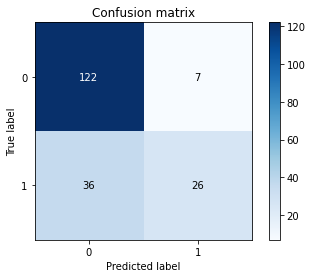

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
clf.score(X_test, y_test)

0.774869109947644

This model seems to be performing poorer than the logistic regressions above.

As we can see below, Glucose and BMI were the most important variables in detecting diabetes using the boosting model.

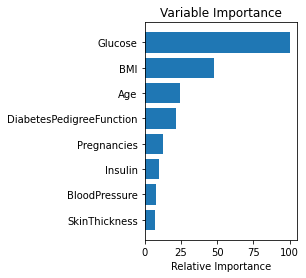

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(small_features, df.Outcome, random_state=40)

params = {'n_estimators': 12345,
          'max_features': 3,
          'learning_rate': 0.001,
          'max_leaf_nodes': 20,
          'max_depth': 10,
          'loss': 'deviance'}

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_transformed, y_train)

predict_train = clf.predict(X_train_transformed)
predict_test = clf.predict(X_test_transformed)

cv_scores = cross_val_score(lr, X_train_transformed, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.79130435 0.82608696 0.76315789 0.75438596 0.78947368]
Mean cross-validation score: 0.785


In [ ]:
accuracy_score(y_test, clf.predict(X_test_transformed))

0.7486910994764397

In comparing both of the model types, logistic regression, although slight, was able to perform better in predcting diabetes than the gradient boosting model.